In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot


In [62]:
# Read the dataset
dataset = pd.read_csv('BankChurners_v2.csv')

In [63]:
# Check the shape of the dataset
print(dataset.shape)

(10127, 23)


In [64]:
# Display the features of the dataset
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [65]:
# Display the first 5 rows of the dataset
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Cleaning 

Duplication

In [66]:
# Data Duplication
# Check the original number of rows 
dataset.shape[0]

10127

There are two ways to check if there are duplications. 

In [67]:
# First way
# CLIENTNUM is a unique number, so it should not be duplicated
# Check if all the CLIENTNUM values are unique
dataset['CLIENTNUM'].nunique()

10127

No duplication in the dataset 

In [68]:
# Second way 
# Drop the duplication
dataset.drop_duplicates(subset= 'CLIENTNUM', keep= False, inplace=True )

# Check back the number of row after dropping any duplicates
dataset.shape

(10127, 23)

Both ways showed no duplicated rows

Drop irrelevant columns

In [69]:
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [70]:
# Check the columns
print(dataset.columns)
# Check the number of columns
print(dataset.shape)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
(10127, 21)


Features' Datatypes

In [71]:
# Check the datatype of the variables
dataset.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Missing Values

In [72]:
# Check if there are any missing values
dataset.isna().sum() # OR dataset.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Three variables have missing values. These variables are categorical.

In [73]:
# Have a look on the missing values in Education_Level
dataset[dataset.Education_Level.isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,...,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,...,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,...,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,...,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


No trend is seen. There also other missing values in other variables in the above rows.

In [74]:
# Investigate the missing values in Marital_Status
dataset[dataset['Marital_Status'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,90039,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,90042,Existing Customer,42,M,5,Uneducated,NaN,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,90045,Existing Customer,35,M,3,Graduate,NaN,$60K - $80K,Blue,30,...,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,100102,Existing Customer,47,M,3,High School,NaN,$80K - $120K,Silver,40,...,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,100132,Existing Customer,39,M,2,Graduate,NaN,$60K - $80K,Silver,36,...,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,100133,Existing Customer,42,M,2,Graduate,NaN,$40K - $60K,Blue,30,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [75]:
# Investigate the missing values in Marital_Status
dataset[dataset['Income_Category'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,90051,Existing Customer,45,F,2,Graduate,Married,NaN,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,90060,Existing Customer,44,F,3,Uneducated,Single,NaN,Blue,34,...,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,90071,Attrited Customer,66,F,0,Doctorate,Married,NaN,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,90076,Existing Customer,38,F,4,Graduate,Single,NaN,Blue,28,...,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,90090,Existing Customer,44,F,5,Graduate,Married,NaN,Blue,35,...,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,100053,Attrited Customer,30,F,1,Graduate,Married,NaN,Blue,18,...,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,100072,Attrited Customer,50,F,3,Doctorate,Single,NaN,Blue,36,...,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,100115,Existing Customer,42,F,4,Uneducated,Married,NaN,Blue,23,...,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,100124,Attrited Customer,40,F,3,Graduate,Married,NaN,Blue,25,...,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


Fill the missing values with "Unknown" in the three variables.

In [76]:
# Impute the missing values with Unknown
dataset['Education_Level'] = dataset['Education_Level'].fillna("Unknown")
dataset['Marital_Status'] = dataset['Marital_Status'].fillna("Unknown")
dataset['Income_Category'] = dataset['Income_Category'].fillna("Unknown")


In [77]:
# Check that there is no missing values
dataset.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [78]:
# Check that the imputation is working well. Compare the rows before and after imputation
dataset[dataset['Education_Level'] == "Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,...,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,...,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [79]:
dataset[dataset['Income_Category'] == "Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,90051,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,90060,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,90071,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,90076,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,90090,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,100053,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,100072,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,100115,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,...,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,100124,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


In [80]:
dataset[dataset['Marital_Status'] == "Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,90035,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,90039,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,90042,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,90045,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,90047,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,100102,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,...,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,100132,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,...,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,100133,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,100150,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


Data Transformation: Binning

In [81]:
# Get the min. and max. age
dataset['Customer_Age'].describe()


count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

You can use cut function in pandas to create bins for the customer age. However, another way is done below where a function is created and apply function is used later to execute it.

In [82]:
def get_age_bins(x):
    if x >=20 and x<30:
        return "20s"
    if x >= 30 and x<40:
        return "30s"
    if x>=40 and x<50:
        return "40s"
    if x>=50 and x<60:
        return "50s"
    if x>=60 and x<70:
        return "60s"
    if x>=70 and x<80:
        return "70s"
    else:
        return ">=80"
    

In [83]:
dataset['customer_age_bin'] = dataset['Customer_Age'].apply(get_age_bins)

In [84]:
dataset['Customer_Age'].head()

0    45
1    49
2    51
3    40
4    40
Name: Customer_Age, dtype: int64

In [85]:
dataset['customer_age_bin'].head()

0    40s
1    40s
2    50s
3    40s
4    40s
Name: customer_age_bin, dtype: object

EDA

In [86]:
dataset["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Calculate the percentage of the churned customers

In [87]:
# Calculate the churn percentage
churned_percent = round(dataset["Attrition_Flag"].value_counts()['Attrited Customer']/ dataset.shape[0] *100 , 2)
# Print the percentage of the churn
print(f"{churned_percent} % of our customers have churned")



16.07 % of our customers have churned


Summary Statistics

The average number of relationship of the customers in years was  around 4 years (3.81).

In [88]:
# The mean and median of the 
print(f"The mean of the toata relatioanship count is :{round(dataset['Total_Relationship_Count'].mean(), 2)} and the medain is {np.median(dataset['Total_Relationship_Count'])}")

The mean of the toata relatioanship count is :3.81 and the medain is 4.0


The longest number of relationship of the customers was 6 years.

In [89]:
print(f"The maximum number of relatioanship count is :{round(np.max(dataset['Total_Relationship_Count']), 2)}")

The maximum number of relatioanship count is :6


The average credit limit of customers was 8631.95 and the median is 4549.

In [90]:
print(f"The average credit limit is : {round(np.mean(dataset['Credit_Limit']), 2)} while the median is {round(np.median(dataset['Credit_Limit']), 2)}")

The average credit limit is : 8631.95 while the median is 4549.0


The difference between the mean and the median of credit_limit suggests the existing of outliers in this variable.

Histograms

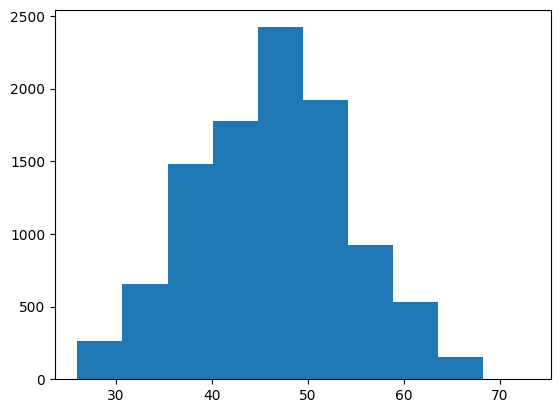

In [91]:
plt.hist(dataset['Customer_Age']);

Based on the above histogram plot, customer age is normaly distributed.

Now, display a histogram showing the frequency of months on booking.

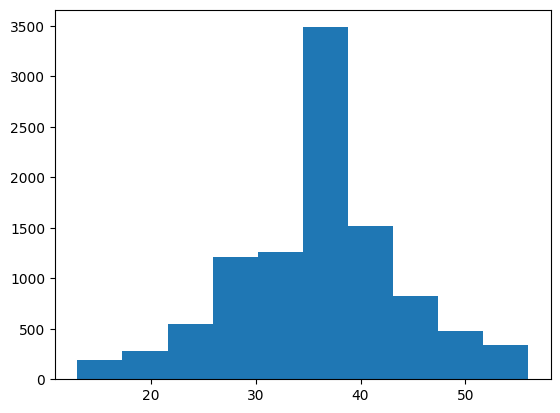

In [92]:
plt.hist(dataset['Months_on_book']);

The above figure shows more normal distributed variable. The biggest number of customers (~3500) have 36 months on booking. More investigation can be conducted to understand this output. The biggest number of customers at 36 months can be linked to a company campain 36 months ago or every new customer gets 36 as a default month_on_booking.

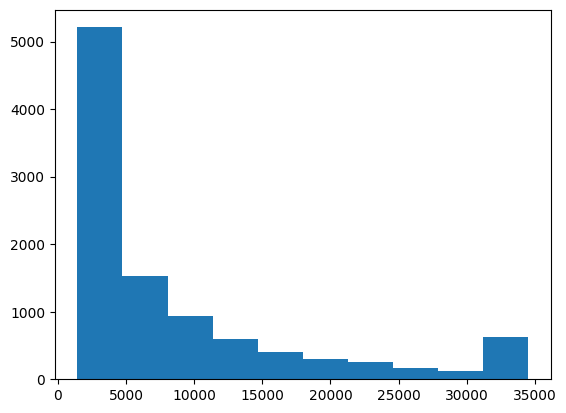

In [93]:
plt.hist(dataset['Credit_Limit']);

The figure shows skewness to the right. Most of the customers have less than 5000 credit limit while smaller number of customers have over this limit. This figure confirms the revealed difference between the medain and the mean of Credit_Limit variable earlier.

Let's show the mean and the median on the histgram.

Text(3549.0, 2550, 'Median')

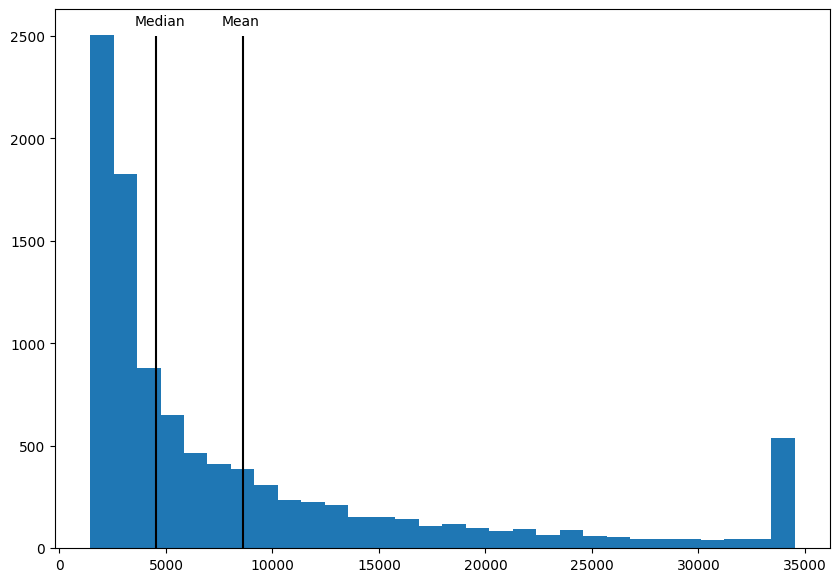

In [94]:
plt.figure(figsize=(10,7))
# Use 30 bins for a better representation for the distribution
plt.hist(dataset['Credit_Limit'], bins=30)
plt.vlines(dataset['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(dataset['Credit_Limit'].median(), 0, 2500,colors='Black')

# Print the mean and median text over the vertical lines
plt.text(dataset['Credit_Limit'].mean()-1000, 2500+50, 'Mean')
plt.text(dataset['Credit_Limit'].median()-1000, 2500+50, 'Median')

Data Transformation: Normalization and Log

Two ways to transform skewed distribution into more normal one. Normalisation using min-max scaler and using log transformation.

In [95]:
# Define a funbction for min-max scaler
def get_normalised_value(column):
    max_val = column.max()
    min_val = column.min()
    y = (column-min_val)/(max_val-min_val)
    return y



Since credit_limit variable is skewed, we will try using the normalisation method to solve the problem. This method will make the values range between 0 and 1.

In [96]:
# Create a new column create the normalised value of Credit_Limit
dataset['Credit_Limit_normalised'] = get_normalised_value(dataset['Credit_Limit'])

In [97]:
# Check the min and max values of the new columnn
print(dataset['Credit_Limit_normalised'].min())
print(dataset['Credit_Limit_normalised'].max())
print(dataset['Credit_Limit_normalised'].mean())
print(dataset['Credit_Limit_normalised'].median())

0.0
1.0
0.21747744547036094
0.09404220970623714


We noticed that the difference between the mean and the median is smaller after the normalisation.

log from Numpy is used for data transformation of the same variable to compare between the two methods. 

In [98]:
# Data transformation using log 
dataset['Credit_Limit_log']= np.log(dataset['Credit_Limit'])

In [99]:
# Check the min and max values of the new columnn
print(dataset['Credit_Limit_log'].min())
print(dataset['Credit_Limit_log'].max())
print(dataset['Credit_Limit_log'].mean())
print(dataset['Credit_Limit_log'].median())

7.271217139609844
10.449178263628198
8.60341207921584
8.422662707570003


We noticed that the difference between the mean and the median is too small after the log transformation.

C:\Users\alaah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\alaah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\alaah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\alaah\AppData\Local\Packages\PythonSoftwareFoundation.Python.

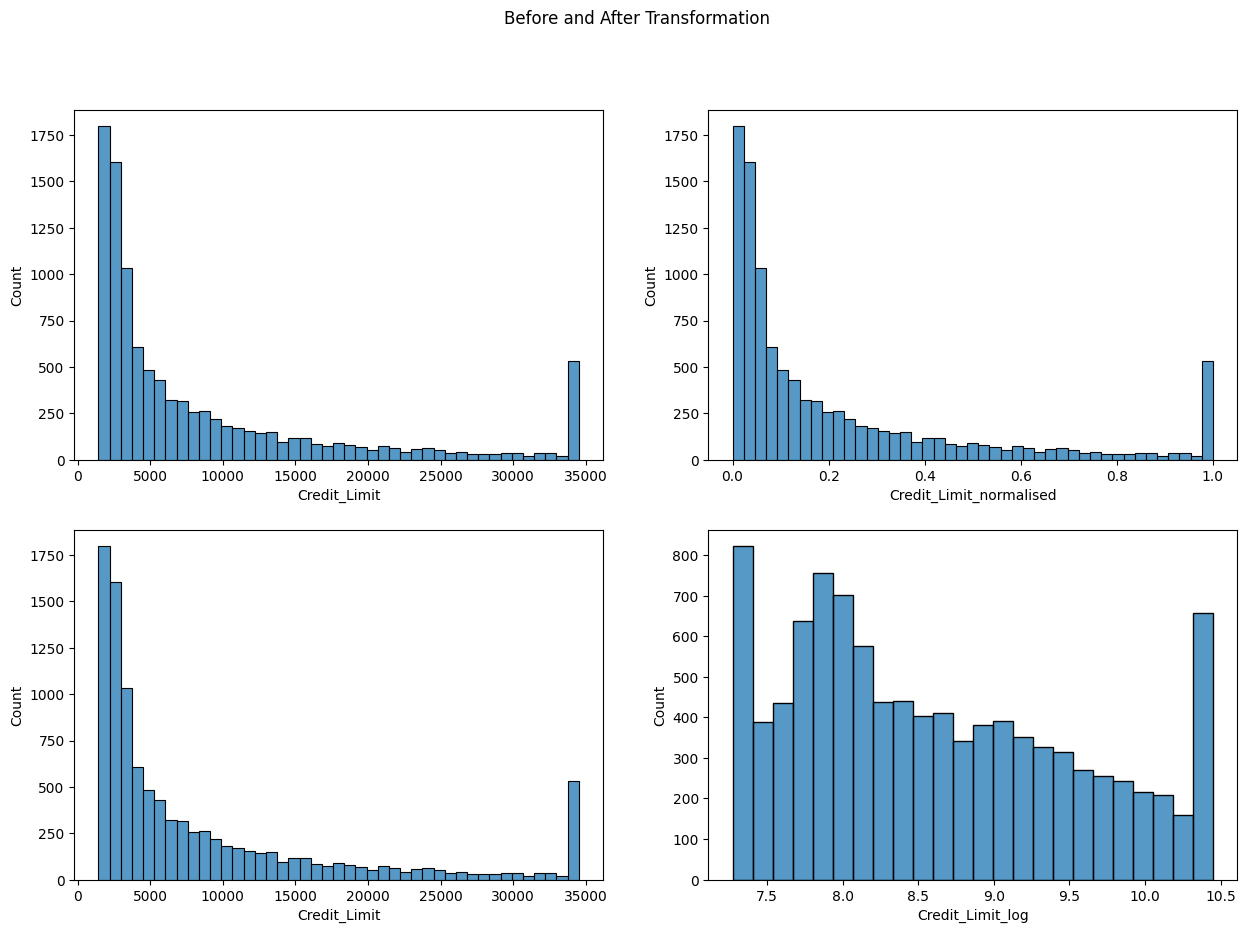

In [100]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
fig.suptitle("Before and After Transformation")
sn.histplot(dataset , x= "Credit_Limit", ax= axes[0,0])
sn.histplot(dataset , x= "Credit_Limit_normalised", ax = axes[0,1])
sn.histplot(dataset , x= "Credit_Limit",ax =  axes[1,0])
sn.histplot(dataset , x= "Credit_Limit_log", ax = axes[1,1]);

The above plots improve that the log transformation makes a better impacts towards a normal distribution. 

Other distribution Plots    

Box and Wisker plots

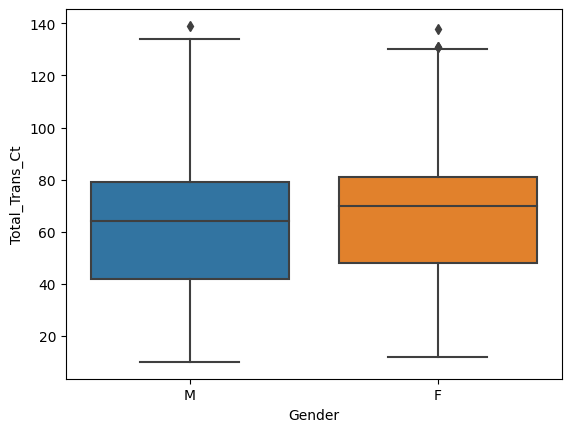

In [101]:
# The box plot helps to easily oidentify the median, quartiles and outliers
sn.boxplot(x = dataset["Gender"] , y= dataset["Total_Trans_Ct"]);

The above plot shows that the median transaction count is higher among females compared with males. There are outliers in of total transaction count in both the males and females.

Pyramid plot

In [104]:
pyramid = dataset.groupby(["Gender", "customer_age_bin"])['CLIENTNUM'].nunique().reset_index()
pyramid

,Gender,customer_age_bin,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,M,20s,102
6,M,30s,885
7,M,40s,2151
8,M,50s,1379
9,M,60s,250


In [106]:
women_bins = np.array(-1 *pyramid[pyramid['Gender'] == 'F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender'] == 'M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],  
                       tickvals=[-2500, -2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500],
                       ticktext=[2500, 2000, 1500, 1000, 500, 0, 500, 1000, 1500, 2000, 2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=data, layout=layout))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed